#Clusterização Hierárquica

Agrupar dados de clientes de uma empresa de e-commerce com base em três variáveis: quantidade de compras, valor dos produtos e nota de revisão. A partir disso, é possível criar ações de marketing personalizadas para cada cluster.

In [183]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import cluster
import seaborn as sns

In [184]:
#leitura da base de dados
varejo = pd.read_excel("Varejo1.xlsx", sheet_name = 'Base de Dados')
varejo.head()

,customer_id,qtde_compras,valor_produtos,nota_revisao
0,03d01c3308507d5d861af0d89b65beee,1,33.00,4
1,70760f5ca54f7826fbc14b679eb949bd,1,79.99,5
2,43cd92deaa3d542fa32fdf4ca3089f51,6,240.00,2
3,676ea4c495818f6654dd38d006cfb1d7,6,86.50,5
4,8702a62684cd9a0ad5a391017c6939d6,4,166.67,2


In [185]:
varejo.shape

(30, 4)

In [186]:
#analise exploratoria da base de dados
varejo.describe()

,qtde_compras,valor_produtos,nota_revisao
count,30.000000,30.000000,30.000000
mean,4.100000,97.183333,6.433333
std,2.056948,63.815055,2.762849
min,1.000000,18.900000,1.000000
25%,2.000000,46.992500,4.250000
50%,4.000000,80.745000,7.000000
75%,6.000000,147.600000,9.000000
max,7.000000,240.000000,10.000000


* Quantidades de compras: 25% dos consumidores realizam até 2 compras; metade dos consumidores realizam até 4 compras, sendo que a outra metade realiza mais que 4 compras; 75% dos consumidores realizam até 6 compras, sendo que 25% realizam entre 6 e 7 compras
* Valor dos produtos: 25% dos consumidores compram produtos cujo valor é de até 46,99; metade dos consumidores consomem prosutos com valores menores ou iguais a 80,75 e a outra metade compra produtos com valores acima de 80,7; 75% dos consumidores compram produtos cujo valor é menor que 147,60, sendo que 25% dos consumidores compram produtos com valores entre 147,60 e 240
* Nota de revisão: 25% dos consumidores atribuem notas de revisão de até 4,25 pontos; metade dos consumidores atribui notas de revisão menores que 7 e a outra metade atribui notas maiores que 7; 75% dos consumidores atribuem notas de revisão de até 9 pontos, sendo que 25% dos consumidores atribuem notas entre 9 e 10 pontos.

Text(0.5, 1.0, 'nota_revisao')

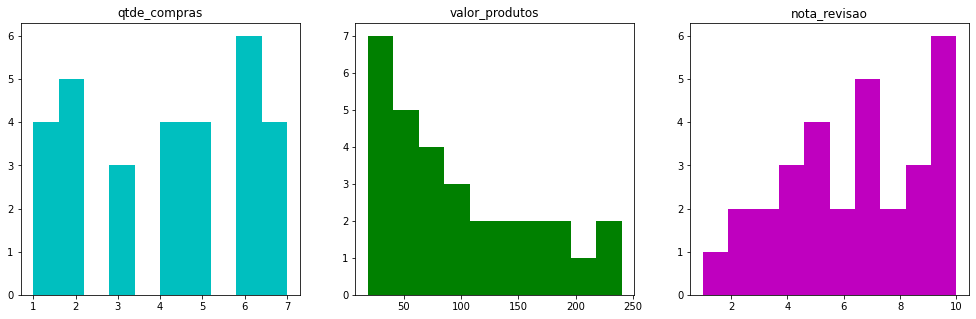

In [187]:
#Verificando se as distribuicoes das variáveis sao simetricas a partir de histogramas
fig, axs = plt.subplots(1, 3, figsize = (17,5))
axs[0].hist(varejo["qtde_compras"], color = 'c')
axs[0].set_title('qtde_compras')
axs[1].hist(varejo["valor_produtos"], color = 'g')
axs[1].set_title('valor_produtos')
axs[2].hist(varejo["nota_revisao"], color = 'm')
axs[2].set_title('nota_revisao')

Analisando os histogramas da três variáveis, é possível concluir que as distribuições não são simétricas. Entretanto, é válido pontuar que, no caso da variável nota de revisão, quanto maiores as notas, maiores as frequências de ocorrência. Para mais, sobre a quantidade de compras, há uma grande quantidade de consumidores que realizam de 1 a 2 e de 6 a 7 compras. Já sobre o valor dos produtos, a maioria dos consumidores compram produtos com valores mais baixos (entre 0 e 100).

Text(0.5, 1.0, 'nota_revisao')

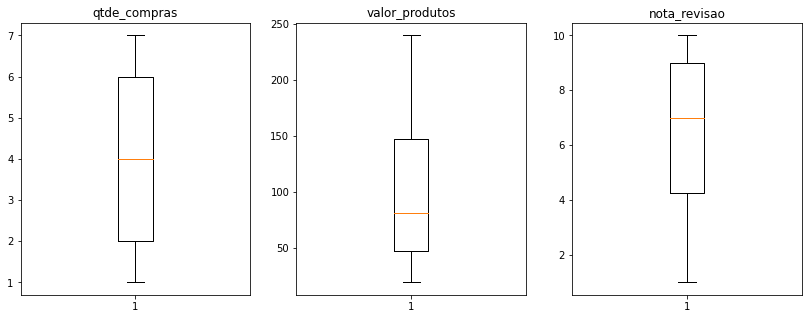

In [188]:
#Verificando se há outliers
fig, axs = plt.subplots(1, 3, figsize = (14,5))
axs[0].boxplot(varejo["qtde_compras"])
axs[0].set_title('qtde_compras')
axs[1].boxplot(varejo["valor_produtos"])
axs[1].set_title('valor_produtos')
axs[2].boxplot(varejo["nota_revisao"])
axs[2].set_title('nota_revisao')

Analisando o boxplot das três variáveis, conclui-se que não há outliers, ou seja, os dados dentro de cada variável não se diferenciam drasticamente uns dos outros.

In [189]:
#Padronizando as variáveis
varejo2 = pd.DataFrame(varejo.iloc[:,1:4])
new_varejo = pd.DataFrame(scale(varejo2), index=varejo2.index, columns=varejo2.columns)
new_varejo

,qtde_compras,valor_produtos,nota_revisao
0,-1.532851,-1.022965,-0.895790
1,-1.532851,-0.274030,-0.527657
2,0.939490,2.276236,-1.632055
3,0.939490,-0.170273,-0.527657
4,-0.049447,1.107490,-1.632055
5,-0.543915,-1.150630,-0.527657
6,-0.049447,0.840207,1.313007
7,-1.532851,1.318352,-0.895790
8,-1.038383,-0.831866,-0.159524
9,-1.038383,1.287910,1.313007


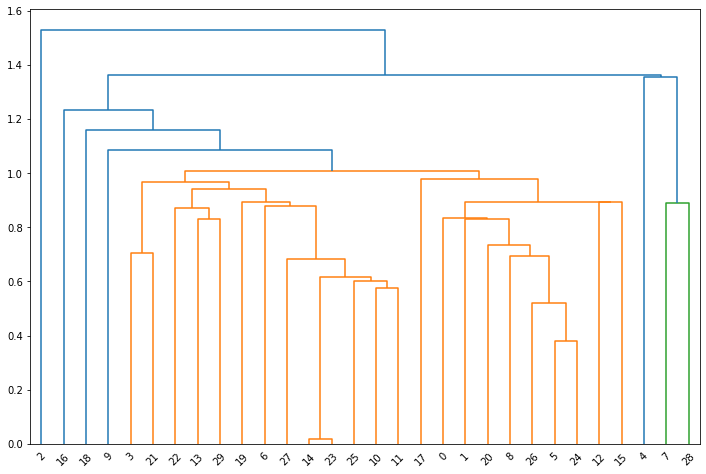

In [190]:
#Calculando a matriz de distancias euclidianas, agrupando as variáveis
#a partir do método do Vizinho mais Próximo e analisando o Dendrograma
clust_single = linkage(new_varejo, method='single', metric='euclidean')
plt.figure(figsize = (12,8))
dendrogram(clust_single)
plt.show()

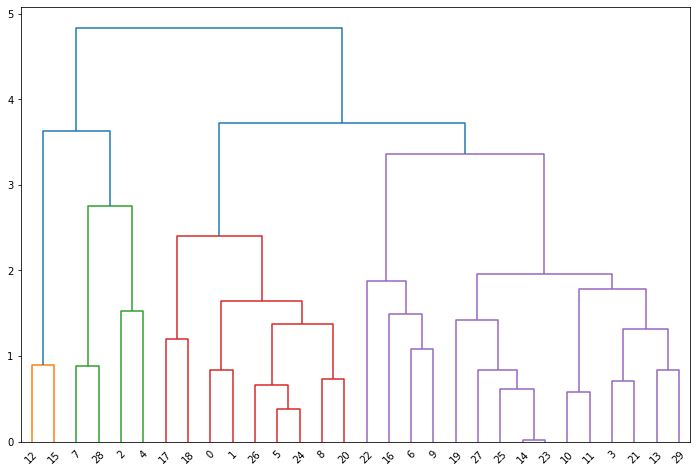

In [191]:
#Calculando a matriz de distancias euclidianas, agrupando as variáveis
#a partir do método do Vizinho mais Distante e analisando o Dendrograma
clust_complete = linkage(new_varejo, method='complete', metric='euclidean')
plt.figure(figsize = (12,8))
dendrogram(clust_complete)
plt.show()

Considerou-se que o método do vizinho mais distante seria o mais adequado, uma vez que as seprações dos grupos ficaram mais espaçadas.

In [192]:
#Identificando os clusters aos quais cada variável pertence
cutree = cluster.hierarchy.cut_tree(clust_complete, n_clusters=4)
cutree = pd.DataFrame(cutree)

clustering = varejo.copy()
clustering['cluster'] = cutree
clustering.head()

,customer_id,qtde_compras,valor_produtos,nota_revisao,cluster
0,03d01c3308507d5d861af0d89b65beee,1,33.00,4,0
1,70760f5ca54f7826fbc14b679eb949bd,1,79.99,5,0
2,43cd92deaa3d542fa32fdf4ca3089f51,6,240.00,2,1
3,676ea4c495818f6654dd38d006cfb1d7,6,86.50,5,2
4,8702a62684cd9a0ad5a391017c6939d6,4,166.67,2,1


In [204]:
#Contando número de consumidores em cada cluster
pd.DataFrame(clustering.value_counts('cluster')).sort_values(by='cluster')

,0
cluster,
0,9
1,4
2,15
3,2


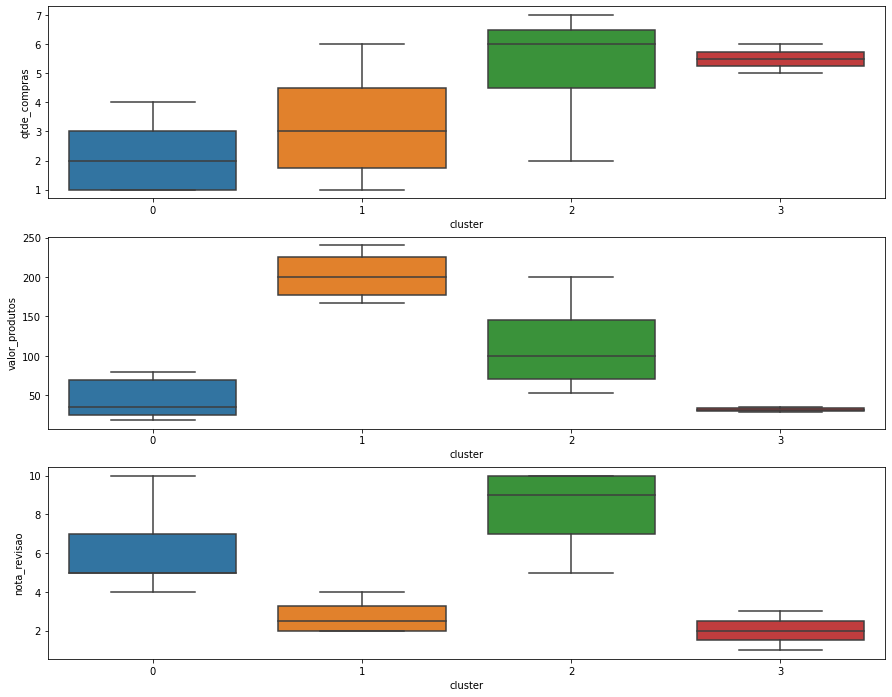

In [193]:
#Plotando um BoxPlot para cada variavel e comparando a distribuicao das variaveis por cluster
fig, axs = plt.subplots(nrows=3, figsize = (15,12))
sns.boxplot(x='cluster', y='qtde_compras', data=clustering, ax=axs[0])
sns.boxplot(x='cluster', y='valor_produtos', data=clustering, ax=axs[1])
sns.boxplot(x='cluster', y='nota_revisao', data=clustering, ax=axs[2])

O Grupo 0 tem 9 clientes, o Grupo 1 tem 4 clientes, o Grupo 2 tem 15 clientes e o Grupo 3 tem 2 clientes. Nesse sentido:
* Grupo 0: fazem compras em pequenas quantidades, consomem produtos de baixo valor e atribuem notas intermediárias  na revisão, de modo que 75% dos clientes atribuem notas de até 7 pontos.
* Grupo 1: os consumidores estão mais dispersos quanto a quantidade de compras, sendo que 75% deles realizam entre 4 e 5 compras; os produtos adquiridos tem valores mais altos, porém as notas de revisão são baixas, sendo que 75% desses consumidores atribuem notas abaixo entre 2 e 4.
* Grupo 2: realizam majoritariamente compras em grandes quantidades, sendo que os produtos adquiridos apresentam geralmente valores intermediários, porém as notas de revisão atribuídas são altas.
* Grupo 3: realizam compras em grandes quantidades, porém adquirem produtos de baixo valor, atribuindo notas de revisão baixas (todas abaixo de 4, aproximadamente).